## Assignment Week 4
 

Centrality measures can be used to predict (positive or negative) outcomes for a node.

Your task in this week’s assignment is to identify an interesting set of network data that is available on the web (either through web scraping or web APIs) that could be used for analyzing and comparing centrality measures across nodes.  As an additional constraint, there should be at least one categorical variable available for each node (such as “Male” or “Female”; “Republican”, “Democrat,” or “Undecided”, etc.)

In addition to identifying your data source, you should create a high level plan that describes how you would load the data for analysis, and describe a hypothetical outcome that could be predicted from comparing degree centrality across categorical groups.

### The Data Source
While I had initially planned to analyze social network data from facebook, I ultimately ended up using and analyzing airport and flights data.  Two different datasets are being utilized in the analysis. This includes:

- An airport dataset that includes a comprehensive list of airport locations
- Flights between airports including the types of planes flying the routes


### High Level Plan

The proposed plan for analysis to load the data and conduct and develop centrality measures. As a first step and in-line with the insructions provided on this assignment, we develop a categorical (or dummy) variable out of equipment or types of planes that are flown and then develop and compare centrality measures around the data.

#### Hypothetical Outcomes
The result of the analysis would be to identify key differences in the measures.

#### Analysis Video
https://youtu.be/WMgvz9UaGCA

In [1]:
import networkx as nx
import matplotlib as plt
import pandas as pd
import seaborn as sns
% matplotlib inline

In [2]:
#nx.info(G)
#nx.average_clustering(G)

In [3]:
airport_col = ['ID', 'Name', 'City', 'Country','IATA', 'ICAO', 'Lat', 'Long', 'Alt','Timezone', 'DST', 'db_time zone', 'type', 'source']
airport_data=pd.read_csv("https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat",header=None,names=airport_col)

In [4]:
airport_data.head(n=5)

,ID,Name,City,Country,IATA,ICAO,Lat,Long,Alt,Timezone,DST,db_time zone,type,source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [5]:
route_cols = ['Airline', 'Airline ID', 'Source Airport', 'Source Airport ID', 'Dest Airport', 'Dest Airport ID', 'Codeshare', 'Stops', 'equipment']
routes_data=pd.read_csv("https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat",header=None,names=route_cols)

In [6]:
#filter to US airports only
US_airports=airport_data.loc[airport_data['Country']=="United States"]

In [7]:
#filter out Airports in Alaska and Hawaii
US_airports=US_airports[(US_airports['db_time zone']!="America/Anchorage")&(US_airports['db_time zone']!="Pacific/Honolulu")]

In [8]:
US_airports.head(n=5)

,ID,Name,City,Country,IATA,ICAO,Lat,Long,Alt,Timezone,DST,db_time zone,type,source
3204,3416,Orlando Executive Airport,Orlando,United States,ORL,KORL,28.545500,-81.332901,113,-5,A,America/New_York,airport,OurAirports
3213,3425,Laurence G Hanscom Field,Bedford,United States,BED,KBED,42.470001,-71.289001,133,-5,A,America/New_York,airport,OurAirports
3220,3432,Oscoda Wurtsmith Airport,Oscoda,United States,OSC,KOSC,44.451599,-83.394096,633,-5,A,America/New_York,airport,OurAirports
3221,3433,Marina Municipal Airport,Fort Ord,United States,OAR,KOAR,36.681900,-121.762001,137,-8,A,America/Los_Angeles,airport,OurAirports
3222,3434,Sacramento Mather Airport,Sacramento,United States,MHR,KMHR,38.553902,-121.297997,98,-8,A,America/Los_Angeles,airport,OurAirports


In [9]:
#select relevant columns of the dataset
US_airports=US_airports.filter(items=['ID','Name','City','IATA','Lat','Long'])
US_airports.head(n=3)

,ID,Name,City,IATA,Lat,Long
3204,3416,Orlando Executive Airport,Orlando,ORL,28.545500,-81.332901
3213,3425,Laurence G Hanscom Field,Bedford,BED,42.470001,-71.289001
3220,3432,Oscoda Wurtsmith Airport,Oscoda,OSC,44.451599,-83.394096


In [10]:
#count of all airports in the dataset
airport_data.count()

ID              7184
Name            7184
City            7140
Country         7184
IATA            7182
ICAO            7184
Lat             7184
Long            7184
Alt             7184
Timezone        7184
DST             7184
db_time zone    7184
type            7184
source          7184
dtype: int64

In [11]:
#count of all airports in the US 
US_airports.count()

ID      1245
Name    1245
City    1245
IATA    1245
Lat     1245
Long    1245
dtype: int64

In [12]:
routes_data.head(n=10)

,Airline,Airline ID,Source Airport,Source Airport ID,Dest Airport,Dest Airport ID,Codeshare,Stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
5,2B,410,DME,4029,KZN,2990,NaN,0,CR2
6,2B,410,DME,4029,NBC,6969,NaN,0,CR2
7,2B,410,DME,4029,TGK,\N,NaN,0,CR2
8,2B,410,DME,4029,UUA,6160,NaN,0,CR2
9,2B,410,EGO,6156,KGD,2952,NaN,0,CR2


In [13]:
routes_data.count()

Airline              67663
Airline ID           67663
Source Airport       67663
Source Airport ID    67663
Dest Airport         67663
Dest Airport ID      67663
Codeshare            14597
Stops                67663
equipment            67645
dtype: int64

In [14]:
# return top 5 plane types used on US continental routes
temp=pd.merge(US_airports,routes_data,left_on='IATA',right_on='Source Airport',how='inner')
temp=temp.drop(columns=['ID','Name','City','Lat','Long'])
temp=temp.rename(index=str,columns={'IATA':'O_IATA'})
temp=pd.merge(US_airports,routes_data,left_on='IATA',right_on='Dest Airport',how='inner')
temp=temp.drop(columns=['ID','Name','City','Lat','Long'])
temp.equipment.value_counts().head(n=5)

CRJ    830
73W    814
320    556
738    488
319    469
Name: equipment, dtype: int64

In [15]:
temp.head(n=5)

,IATA,Airline,Airline ID,Source Airport,Source Airport ID,Dest Airport,Dest Airport ID,Codeshare,Stops,equipment
0,FSM,AA,24,DFW,3670,FSM,3437,Y,0,ER4 ERD
1,FSM,AF,137,ATL,3682,FSM,3437,Y,0,CRJ
2,FSM,DL,2009,ATL,3682,FSM,3437,Y,0,CRJ
3,FSM,KL,3090,ATL,3682,FSM,3437,Y,0,CRJ
4,FSM,US,5265,DFW,3670,FSM,3437,NaN,0,ER4 ERD


In [16]:
#top 5 planes used across all routes
routes_data.equipment.value_counts().head(n=5)

320    9180
738    7124
319    3420
737    2211
73H    2043
Name: equipment, dtype: int64

In [17]:
#create categorical values by equipment type
routes_data.insert(loc=9,column='e_320',value=0)
routes_data.insert(loc=9,column='e_738',value=0)
routes_data.insert(loc=9,column='e_319',value=0)
routes_data.insert(loc=9,column='e_CRJ',value=0)
routes_data.insert(loc=9,column='e_73W',value=0)

In [18]:
routes_data.head(n=5)

,Airline,Airline ID,Source Airport,Source Airport ID,Dest Airport,Dest Airport ID,Codeshare,Stops,equipment,e_73W,e_CRJ,e_319,e_738,e_320
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2,0,0,0,0,0
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2,0,0,0,0,0
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2,0,0,0,0,0
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2,0,0,0,0,0
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2,0,0,0,0,0


In [19]:
#develop indicator variables for key plane types
routes_data.loc[routes_data['equipment']=='320',['e_320']]=1
routes_data.loc[routes_data['equipment']=='738',['e_738']]=1
routes_data.loc[routes_data['equipment']=='319',['e_319']]=1
routes_data.loc[routes_data['equipment']=='CRJ',['e_CRJ']]=1
routes_data.loc[routes_data['equipment']=='73W',['e_73W']]=1

In [20]:
routes_data.loc[routes_data['equipment']=='CRJ'].head(n=5)

,Airline,Airline ID,Source Airport,Source Airport ID,Dest Airport,Dest Airport ID,Codeshare,Stops,equipment,e_73W,e_CRJ,e_319,e_738,e_320
81,2J,470,ABJ,253,BOY,247,NaN,0,CRJ,0,1,0,0,0
83,2J,470,ACC,248,OUA,246,NaN,0,CRJ,0,1,0,0,0
86,2J,470,BKO,1044,OUA,246,NaN,0,CRJ,0,1,0,0,0
87,2J,470,BOY,247,ABJ,253,NaN,0,CRJ,0,1,0,0,0
88,2J,470,BOY,247,OUA,246,NaN,0,CRJ,0,1,0,0,0


In [21]:
#select relevant columns for routes data
routes_data_CRJ=routes_data.filter(items=['Source Airport','Source Airport ID','Dest Airport','Dest Airport ID','equipment','e_CRJ'])

In [22]:
#created a merged dataset
merged_rs=pd.merge(US_airports,routes_data_CRJ,left_on='IATA',right_on='Source Airport',how='inner')

In [23]:
merged_rs=merged_rs.rename(index=str,columns={'Name':'OName','City':'O_City','Lat':'O_Lat','Long':'O_Long'})

In [24]:
merged_rs=merged_rs.dropna()

In [25]:
merged_rs=merged_rs.drop(columns=['ID','IATA'])
merged_rs.head(n=5)

,OName,O_City,O_Lat,O_Long,Source Airport,Source Airport ID,Dest Airport,Dest Airport ID,equipment,e_CRJ
0,Fort Smith Regional Airport,Fort Smith,35.336601,-94.367401,FSM,3437,DFW,3670,ER4 ERD,0
1,Fort Smith Regional Airport,Fort Smith,35.336601,-94.367401,FSM,3437,ATL,3682,CRJ,1
2,Fort Smith Regional Airport,Fort Smith,35.336601,-94.367401,FSM,3437,ATL,3682,CRJ,1
3,Fort Smith Regional Airport,Fort Smith,35.336601,-94.367401,FSM,3437,ATL,3682,CRJ,1
4,Fort Smith Regional Airport,Fort Smith,35.336601,-94.367401,FSM,3437,DFW,3670,ER4 ERD,0


In [26]:
merged_rs=pd.merge(US_airports,merged_rs,right_on='Dest Airport',left_on='IATA',how='inner')

In [27]:
merged_rs=merged_rs.drop(columns=['ID','IATA'])
merged_rs=merged_rs.rename(index=str,columns={'Name':'DName','City':'D_City','Lat':'D_Lat','Long':'D_Long'})

In [28]:
merged_rs.dropna()
merged_rs.head(n=5)

,DName,D_City,D_Lat,D_Long,OName,O_City,O_Lat,O_Long,Source Airport,Source Airport ID,Dest Airport,Dest Airport ID,equipment,e_CRJ
0,Fort Smith Regional Airport,Fort Smith,35.336601,-94.367401,Dallas Fort Worth International Airport,Dallas-Fort Worth,32.896801,-97.038002,DFW,3670,FSM,3437,ER4 ERD,0
1,Fort Smith Regional Airport,Fort Smith,35.336601,-94.367401,Dallas Fort Worth International Airport,Dallas-Fort Worth,32.896801,-97.038002,DFW,3670,FSM,3437,ER4 ERD,0
2,Fort Smith Regional Airport,Fort Smith,35.336601,-94.367401,Hartsfield Jackson Atlanta International Airport,Atlanta,33.636700,-84.428101,ATL,3682,FSM,3437,CRJ,1
3,Fort Smith Regional Airport,Fort Smith,35.336601,-94.367401,Hartsfield Jackson Atlanta International Airport,Atlanta,33.636700,-84.428101,ATL,3682,FSM,3437,CRJ,1
4,Fort Smith Regional Airport,Fort Smith,35.336601,-94.367401,Hartsfield Jackson Atlanta International Airport,Atlanta,33.636700,-84.428101,ATL,3682,FSM,3437,CRJ,1


In [29]:
rs_counts=merged_rs.groupby(['Source Airport','Dest Airport','e_CRJ']).count()
rs_counts=rs_counts.filter(items=['Source Airport','Dest Airport','equipment'])

In [30]:
rs_counts=rs_counts.reset_index()

In [31]:
rs_counts=rs_counts.sort_values(by=['equipment'],ascending=False)
rs_counts_eCRJ_0=rs_counts.loc[rs_counts['e_CRJ']==0]

In [32]:
rs_counts_eCRJ_0.head(n=5)

,Source Airport,Dest Airport,e_CRJ,equipment
3573,ORD,ATL,0,20
219,ATL,ORD,0,19
3664,ORD,MSY,0,13
3162,MIA,ATL,0,12
204,ATL,MIA,0,12


In [33]:
rs_counts_eCRJ_1=rs_counts.loc[rs_counts['e_CRJ']==1]

In [34]:
rs_counts_eCRJ_1.head(n=5)

,Source Airport,Dest Airport,e_CRJ,equipment
3273,MRY,LAX,1,4
2693,LAX,MRY,1,4
1722,EVV,ATL,1,4
1928,FWA,ATL,1,4
36,ABY,ATL,1,4


In [35]:
#merge other attributes with dataframe, particularly origin and destination city names
rs_counts_eCRJ_0=pd.merge(rs_counts_eCRJ_0,US_airports,left_on='Source Airport',right_on='IATA',how='inner')

In [36]:
#drop extra columns and rename
rs_counts_eCRJ_0=rs_counts_eCRJ_0.drop(columns=['ID','IATA','Lat','Long'])
rs_counts_eCRJ_0=rs_counts_eCRJ_0.rename(index=str,columns={'Name':'OName','City':'O_City'})
rs_counts_eCRJ_0.head(n=5)

,Source Airport,Dest Airport,e_CRJ,equipment,OName,O_City
0,ORD,ATL,0,20,Chicago O'Hare International Airport,Chicago
1,ORD,MSY,0,13,Chicago O'Hare International Airport,Chicago
2,ORD,LAX,0,6,Chicago O'Hare International Airport,Chicago
3,ORD,LGA,0,5,Chicago O'Hare International Airport,Chicago
4,ORD,JFK,0,5,Chicago O'Hare International Airport,Chicago


In [37]:
#merge other attributes with dataframe, particularly origin and destination city names
rs_counts_eCRJ_0=pd.merge(US_airports,rs_counts_eCRJ_0,right_on='Dest Airport',left_on='IATA',how='inner')

In [38]:
#drop extra columns and rename
rs_counts_eCRJ_0=rs_counts_eCRJ_0.drop(columns=['ID','IATA','Lat','Long'])
rs_counts_eCRJ_0=rs_counts_eCRJ_0.rename(index=str,columns={'Name':'DName','City':'D_City'})

In [39]:
rs_counts_eCRJ_0.dropna
rs_counts_eCRJ_0.head(n=5)

,DName,D_City,Source Airport,Dest Airport,e_CRJ,equipment,OName,O_City
0,Fort Smith Regional Airport,Fort Smith,DFW,FSM,0,2,Dallas Fort Worth International Airport,Dallas-Fort Worth
1,Grand Forks International Airport,Grand Forks,LAS,GFK,0,1,McCarran International Airport,Las Vegas
2,Grand Forks International Airport,Grand Forks,SFB,GFK,0,1,Orlando Sanford International Airport,Sanford
3,Grand Forks International Airport,Grand Forks,AZA,GFK,0,1,Phoenix-Mesa-Gateway Airport,Mesa
4,Ernest A. Love Field,Prescott,LAX,PRC,0,1,Los Angeles International Airport,Los Angeles


In [40]:
graph_rs_0 = nx.from_pandas_edgelist(rs_counts_eCRJ_0, source = 'Source Airport', target = 'Dest Airport',edge_attr = 'equipment',create_using = nx.DiGraph())

In [41]:
graph_rs_1 = nx.from_pandas_edgelist(rs_counts_eCRJ_1, source = 'Source Airport', target = 'Dest Airport',edge_attr = 'equipment',create_using = nx.DiGraph())

In [42]:
#nx.set_node_attributes(graph_rs_0, pd.Series(rs_counts_e737_0.O_City, index=rs_counts_e737_0.index).to_dict(), 'O_City')
for i in sorted(graph_rs_0.nodes()):
    graph_rs_0.node[i]['O_City'] = rs_counts_eCRJ_0.loc[rs_counts_eCRJ_0['Source Airport']==i].O_City
    graph_rs_0.node[i]['D_City'] = rs_counts_eCRJ_0.loc[rs_counts_eCRJ_0['Dest Airport']==i].D_City
    #G.node[i]['gender'] = nodes.gender[i]
    #print graph_rs_0.node[i]e737_0.loc[rs_counts_e737_0['Source Airport']==i].O_City

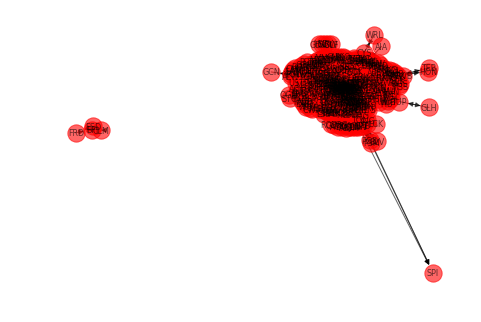

In [43]:
#flights that do not have the CRJ as a plane
nx.draw(graph_rs_0,with_labels=True, node_color='r',font_size=8,alpha=0.6)

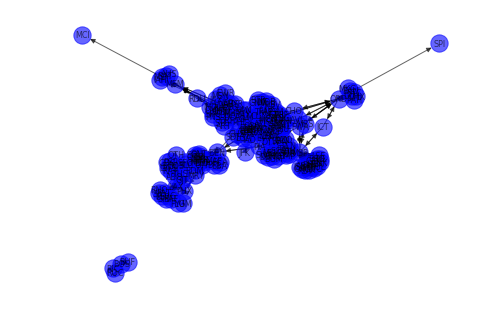

In [44]:
#flights with a CRJ plane
nx.draw(graph_rs_1,with_labels=True, node_color='b',font_size=8,alpha=0.6)

In [45]:
len(graph_rs_0)

376

In [46]:
len(graph_rs_1)

181

In [47]:
#show degree centrality for graph of CRJ flights
deg_cent=nx.degree_centrality(graph_rs_0)
deg_cent=pd.DataFrame.from_dict(deg_cent,orient='index',columns=['Degree_Centrality'])
deg_cent=pd.merge(deg_cent,US_airports,left_index=True,right_on='IATA',how='left')
deg_cent=deg_cent.drop(columns=['ID','Lat','Long'])
deg_cent=deg_cent.sort_values(by=['Degree_Centrality'],ascending=False)
deg_cent.head(n=5)

,Degree_Centrality,Name,City,IATA
3455,0.717333,Dallas Fort Worth International Airport,Dallas-Fort Worth,DFW
3611,0.714667,Chicago O'Hare International Airport,Chicago,ORD
3467,0.690667,Hartsfield Jackson Atlanta International Airport,Atlanta,ATL
3533,0.674667,Denver International Airport,Denver,DEN
3657,0.592000,McCarran International Airport,Las Vegas,LAS


In [48]:
deg_cent.tail(n=5)

,Degree_Centrality,Name,City,IATA
4436,0.005333,Adirondack Regional Airport,Saranac Lake,SLK
3652,0.005333,Casper-Natrona County International Airport,Casper,CPR
5312,0.005333,Mc Cook Ben Nelson Regional Airport,McCook,MCK
5354,0.005333,Merced Regional Macready Field,Merced,MCE
3807,0.005333,Central Wisconsin Airport,Wassau,CWA


In [49]:
deg_cent_1=nx.degree_centrality(graph_rs_1)
deg_cent_1=pd.DataFrame.from_dict(deg_cent_1,orient='index',columns=['Degree_Centrality'])
deg_cent_1=pd.merge(deg_cent_1,US_airports,left_index=True,right_on='IATA',how='left')
deg_cent_1=deg_cent_1.drop(columns=['ID','Lat','Long'])
deg_cent_1=deg_cent_1.sort_values(by=['Degree_Centrality'],ascending=False)
deg_cent_1.head(n=5)

,Degree_Centrality,Name,City,IATA
3467,0.400000,Hartsfield Jackson Atlanta International Airport,Atlanta,ATL
3430,0.388889,Detroit Metropolitan Wayne County Airport,Detroit,DTW
3308,0.338889,Ronald Reagan Washington National Airport,Washington,DCA
3638,0.333333,Minneapolis-St Paul International/Wold-Chamber...,Minneapolis,MSP
3656,0.233333,Charlotte Douglas International Airport,Charlotte,CLT


In [50]:
deg_cent_1.tail(n=5)

,Degree_Centrality,Name,City,IATA
3246,0.005556,Kansas City International Airport,Kansas City,MCI
3530,0.005556,Norman Y. Mineta San Jose International Airport,San Jose,SJC
3632,0.005556,Alexandria International Airport,Alexandria,AEX
3541,0.005556,Port Columbus International Airport,Columbus,CMH
4043,0.005556,Abraham Lincoln Capital Airport,Springfield,SPI


In [51]:
a=nx.degree(graph_rs_0)
a=pd.DataFrame.from_dict(dict(a),orient='index',columns=['degree'])
a=a.sort_values(by=['degree'],ascending=False)
a.head(n=5)

,degree
DFW,269
ORD,268
ATL,259
DEN,253
LAS,222


In [52]:
a=nx.degree(graph_rs_1)
a=pd.DataFrame.from_dict(dict(a),orient='index',columns=['degree'])
a=a.sort_values(by=['degree'],ascending=False)
a.head(n=5)

,degree
ATL,72
DTW,70
DCA,61
MSP,60
CLT,42


#### Comments on results
Based on the analysis above it does seem like Dallas Forth Worth, Chicago and Atlanta have the highest non-CRJ flights (both to and from) while Atlanta, Detriot, DC and Minneapolis have the highest CRJ flights.

In [53]:
c=pd.DataFrame.from_dict(nx.betweenness_centrality(graph_rs_0),orient='index',columns=['betweeness'])
c.sort_values(by=['betweeness'],ascending=False).head(n=5)

,betweeness
DEN,0.174097
DFW,0.137263
ORD,0.116105
ATL,0.095660
LAS,0.080088


In [54]:
d=pd.DataFrame.from_dict(nx.eigenvector_centrality(graph_rs_0),orient='index',columns=['eigenvector'])
d.sort_values(by=['eigenvector'],ascending=False).head(n=5)

,eigenvector
ATL,0.194803
ORD,0.190270
DFW,0.185539
DEN,0.179541
LAS,0.174918


In [55]:
e=pd.DataFrame.from_dict(nx.pagerank(graph_rs_0),orient='index',columns=['page_rank'])
e.sort_values(by=['page_rank'],ascending=False).head(n=5)

,page_rank
DEN,0.030671
DFW,0.030038
ORD,0.027552
ATL,0.025858
LAS,0.021456


#### Comments on results
For non-CRJ flights, the results show that top 5 accross different centrality metrics are the same, although the rank order within the top 5 varies from metric to metric

In [56]:
c=pd.DataFrame.from_dict(nx.betweenness_centrality(graph_rs_1),orient='index',columns=['betweeness'])
c.sort_values(by=['betweeness'],ascending=False).head(n=5)

,betweeness
DEN,0.347876
ATL,0.235193
DTW,0.213970
MSP,0.200298
PIA,0.199481


In [57]:
d=pd.DataFrame.from_dict(nx.eigenvector_centrality(graph_rs_1),orient='index',columns=['eigenvector'])
d.sort_values(by=['eigenvector'],ascending=False).head(n=5)

,eigenvector
DTW,0.415238
ATL,0.359164
DCA,0.299962
MSP,0.244967
GSP,0.177032


In [58]:
e=pd.DataFrame.from_dict(nx.pagerank(graph_rs_1),orient='index',columns=['page_rank'])
e.sort_values(by=['page_rank'],ascending=False).head(n=5)

,page_rank
ATL,0.066646
DTW,0.059283
MSP,0.057324
DCA,0.054078
DEN,0.031421


#### Comments on results
For CRJ flights, the results show that top 3 accross different centrality metrics are the same, but 4th rank order and 5th rank order from from metric to metric

In [59]:
a=nx.ego_graph(graph_rs_0,'ORD')
b=nx.ego_graph(graph_rs_0,'ATL')
c=nx.ego_graph(graph_rs_0,'DEN')

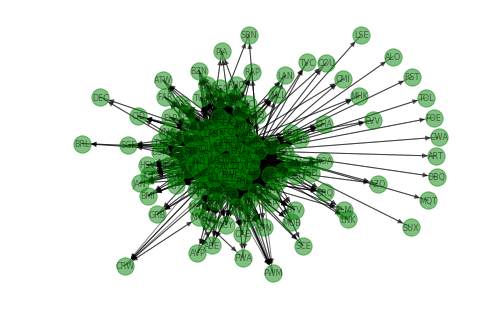

In [60]:
nx.draw(a,with_labels=True,node_color='g',alpha=0.5,font_size=8)

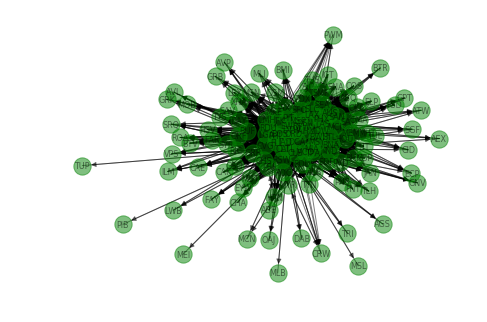

In [61]:
nx.draw(b,with_labels=True,node_color='g',alpha=0.5,font_size=8)

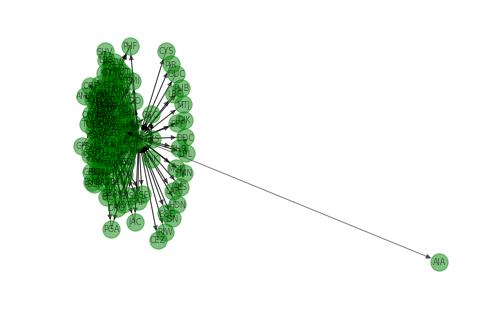

In [62]:
nx.draw(c,with_labels=True,node_color='g',alpha=0.5,font_size=8)

In [63]:
a=nx.ego_graph(graph_rs_1,'DEN')
b=nx.ego_graph(graph_rs_1,'DTW')
c=nx.ego_graph(graph_rs_1,'ATL')

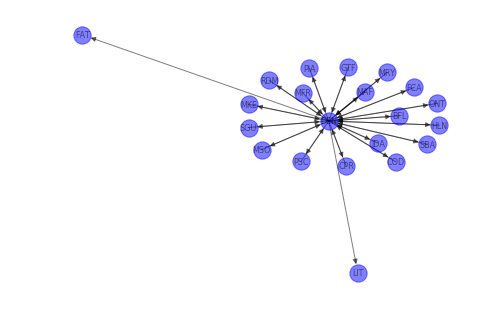

In [64]:
nx.draw(a,with_labels=True,node_color='b',alpha=0.5,font_size=8)

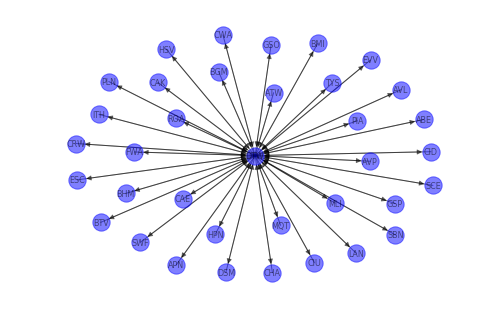

In [65]:
nx.draw(b,with_labels=True,node_color='b',alpha=0.5,font_size=8)

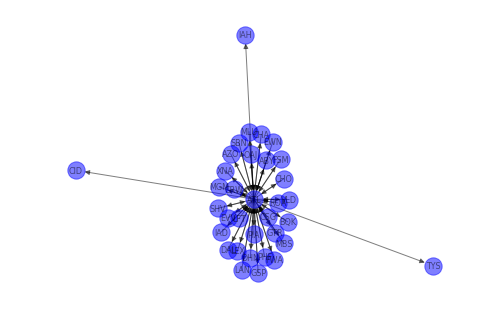

In [66]:
nx.draw(c,with_labels=True,node_color='b',alpha=0.5,font_size=8)

Based on the results above it does seem that CRJ flights and non-CRJ flights have some key differences.

#References
https://towardsdatascience.com/catching-that-flight-visualizing-social-network-with-networkx-and-basemap-ce4a0d2eaea6
